In [1]:
%%capture [--no-stdout]
import numpy as np
import pandas as pd
from itables import init_notebook_mode, show
init_notebook_mode(all_interactive=True)
import itables.options as opt

opt.classes="display nowrap compact"
opt.buttons=["copyHtml5", "csvHtml5", "excelHtml5"]
opt.maxBytes=0
%env FHIR_BASE= https://google-fhir.fhir-aggregator.org

!fq vocabulary vocabulary.tsv --fhir-base-url $FHIR_BASE
df = pd.read_csv('vocabulary.tsv', sep='\t').fillna('')


# FHIR Extensions

A FHIR extension provides a way to add custom data elements to existing FHIR resources, enabling the representation of information that is not defined in the core FHIR specification. They allow for flexibility and extensibility within FHIR while maintaining interoperability.

The vocuabulary Observation includes a summary of these extensions

In [3]:
# extensions with ranges
combined_extension_range_counts = df[['research_study_identifiers', 'path', 'extension_url', 'low', 'high', 'url']]
combined_extension_range_counts = combined_extension_range_counts[combined_extension_range_counts['extension_url'] != '']
combined_extension_range_counts = combined_extension_range_counts[combined_extension_range_counts['low'] != '']
combined_extension_range_counts

research_study_identifiers                         path  \
12                        ICGC-LUCA_KR  DocumentReference.extension   
3739                       Cellosaurus            Patient.extension   
3771                               1KG  DocumentReference.extension   
3881   BEATAML1.0-CRENOLANIB,phs001628  DocumentReference.extension   
3886   BEATAML1.0-CRENOLANIB,phs001628            Patient.extension   
...                                ...                          ...   
20182                        TCGA-KIRP            Patient.extension   
20527                        TCGA-LUAD  DocumentReference.extension   
20540                        TCGA-LUAD            Patient.extension   
20886                        TCGA-HNSC  DocumentReference.extension   
20899                        TCGA-HNSC            Patient.extension   

                                           extension_url      low  \
12     https://nih-ncpi.github.io/ncpi-fhir-ig-2/Stru...    365.0   
3739   http://hl7.org/fhir/SearchParameter/patient-ex...      1.0   
3771   https://nih-ncpi.github.io/ncpi-fhir-ig-2/Stru...  36047.0   
3881   https://nih-ncpi.github.io/ncpi-fhir-ig-2/Stru...   4220.0   
3886   http://hl7.org/fhir/SearchParameter/patient-ex...     24.0   
...                                                  ...      ...   
20182  http://hl7.org/fhir/SearchParameter/patient-ex...     28.0   
20527  https://nih-ncpi.github.io/ncpi-fhir-ig-2/Stru...    229.0   
20540  http://hl7.org/fhir/SearchParameter/patient-ex...     33.0   
20886  https://nih-ncpi.github.io/ncpi-fhir-ig-2/Stru...    229.0   
20899  http://hl7.org/fhir/SearchParameter/patient-ex...     19.0   

                 high url  
12     206822704094.0      
3739             94.0      
3771    16099441977.0      
3881    45589228155.0      
3886             87.0      
...               ...  ..  
20182            88.0      
20527  609805717102.0      
20540            88.0      
20886  578035949313.0      
20899            89.0      

[138 rows x 6 columns]

In [3]:
# extensions with codes
combined_extension_code_counts = df[['research_study_identifiers', 'path', 'extension_url', 'display', 'url', 'count']]
combined_extension_code_counts = combined_extension_code_counts[combined_extension_code_counts['extension_url'] != '']
combined_extension_code_counts = combined_extension_code_counts[combined_extension_code_counts['display'] != '']
combined_extension_code_counts

research_study_identifiers               path  \
144                  TNP SARDANA  Patient.extension   
145                  TNP SARDANA  Patient.extension   
549                        HTAPP  Patient.extension   
550                        HTAPP  Patient.extension   
551                        HTAPP  Patient.extension   
...                          ...                ...   
21740                  HCMI-CMDC  Patient.extension   
21741                  HCMI-CMDC  Patient.extension   
21742                  HCMI-CMDC  Patient.extension   
21743                  HCMI-CMDC  Patient.extension   
21744                  HCMI-CMDC  Patient.extension   

                                           extension_url  \
144    http://hl7.org/fhir/us/core/StructureDefinitio...   
145    http://hl7.org/fhir/us/core/StructureDefinitio...   
549    http://hl7.org/fhir/us/core/StructureDefinitio...   
550    http://hl7.org/fhir/us/core/StructureDefinitio...   
551    http://hl7.org/fhir/us/core/StructureDefinitio...   
...                                                  ...   
21740  http://hl7.org/fhir/us/core/StructureDefinitio...   
21741  http://hl7.org/fhir/us/core/StructureDefinitio...   
21742  http://hl7.org/fhir/us/core/StructureDefinitio...   
21743  http://hl7.org/fhir/us/core/StructureDefinitio...   
21744  http://hl7.org/fhir/us/core/StructureDefinitio...   

                         display  \
144                 Not Reported   
145                        white   
549       not hispanic or latino   
550           hispanic or latino   
551                 Not Reported   
...                          ...   
21740  black or african american   
21741     not hispanic or latino   
21742               not reported   
21743                    Unknown   
21744         hispanic or latino   

                                                     url  count  
144    https://google-fhir.fhir-aggregator.org/Patien...    2.0  
145    https://google-fhir.fhir-aggregator.org/Patien...    2.0  
549    https://google-fhir.fhir-aggregator.org/Patien...  158.0  
550    https://google-fhir.fhir-aggregator.org/Patien...    4.0  
551    https://google-fhir.fhir-aggregator.org/Patien...   34.0  
...                                                  ...    ...  
21740  https://google-fhir.fhir-aggregator.org/Patien...   16.0  
21741  https://google-fhir.fhir-aggregator.org/Patien...  158.0  
21742  https://google-fhir.fhir-aggregator.org/Patien...   42.0  
21743  https://google-fhir.fhir-aggregator.org/Patien...   67.0  
21744  https://google-fhir.fhir-aggregator.org/Patien...   11.0  

[872 rows x 6 columns]

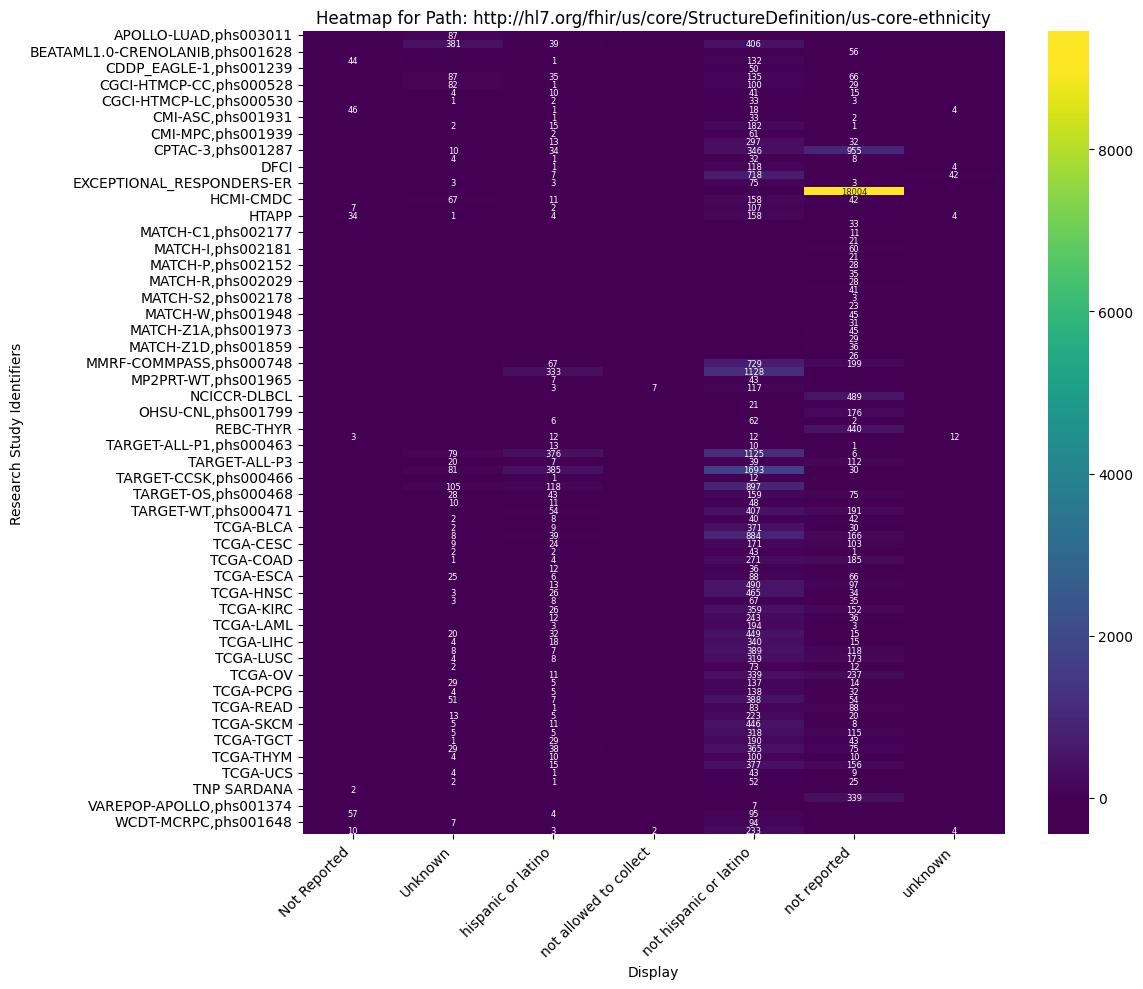

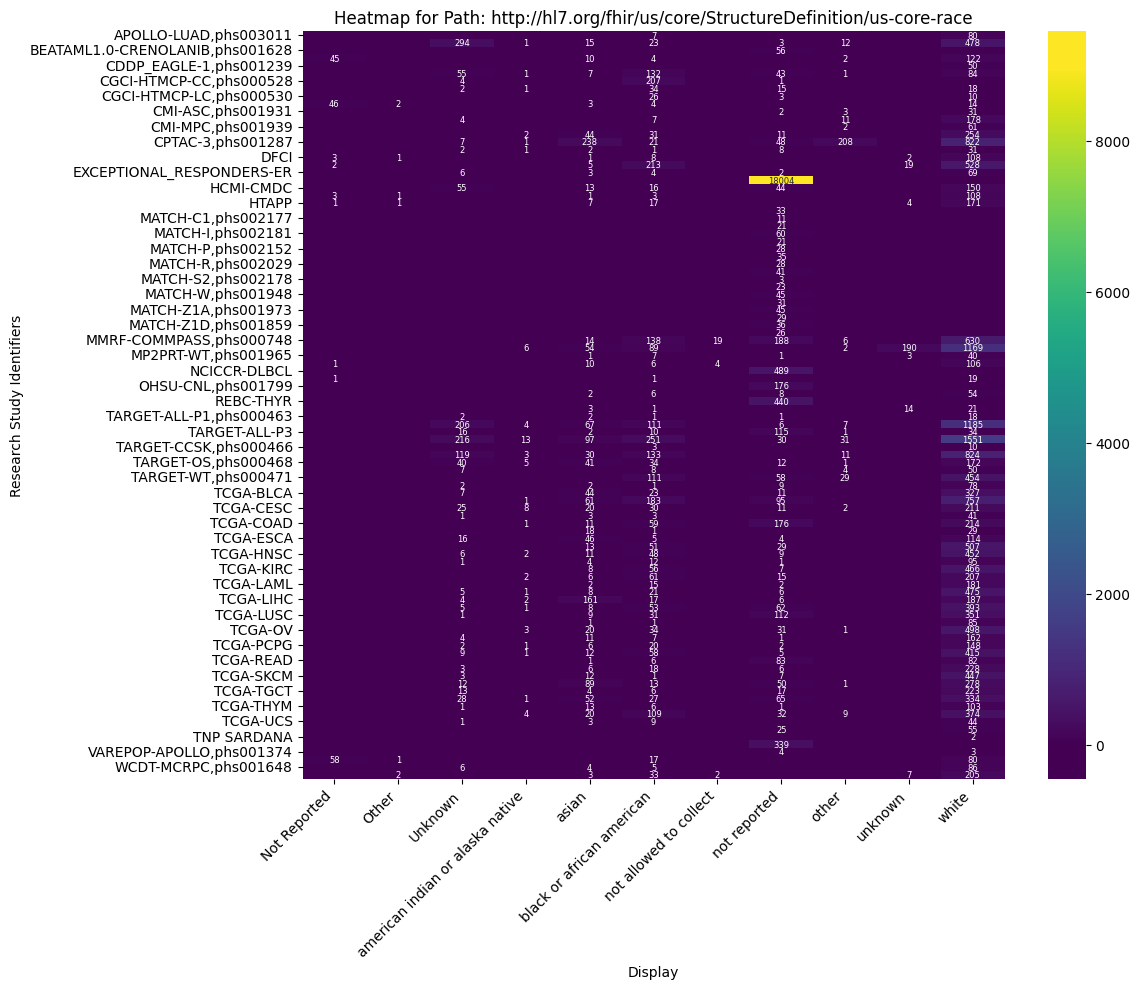

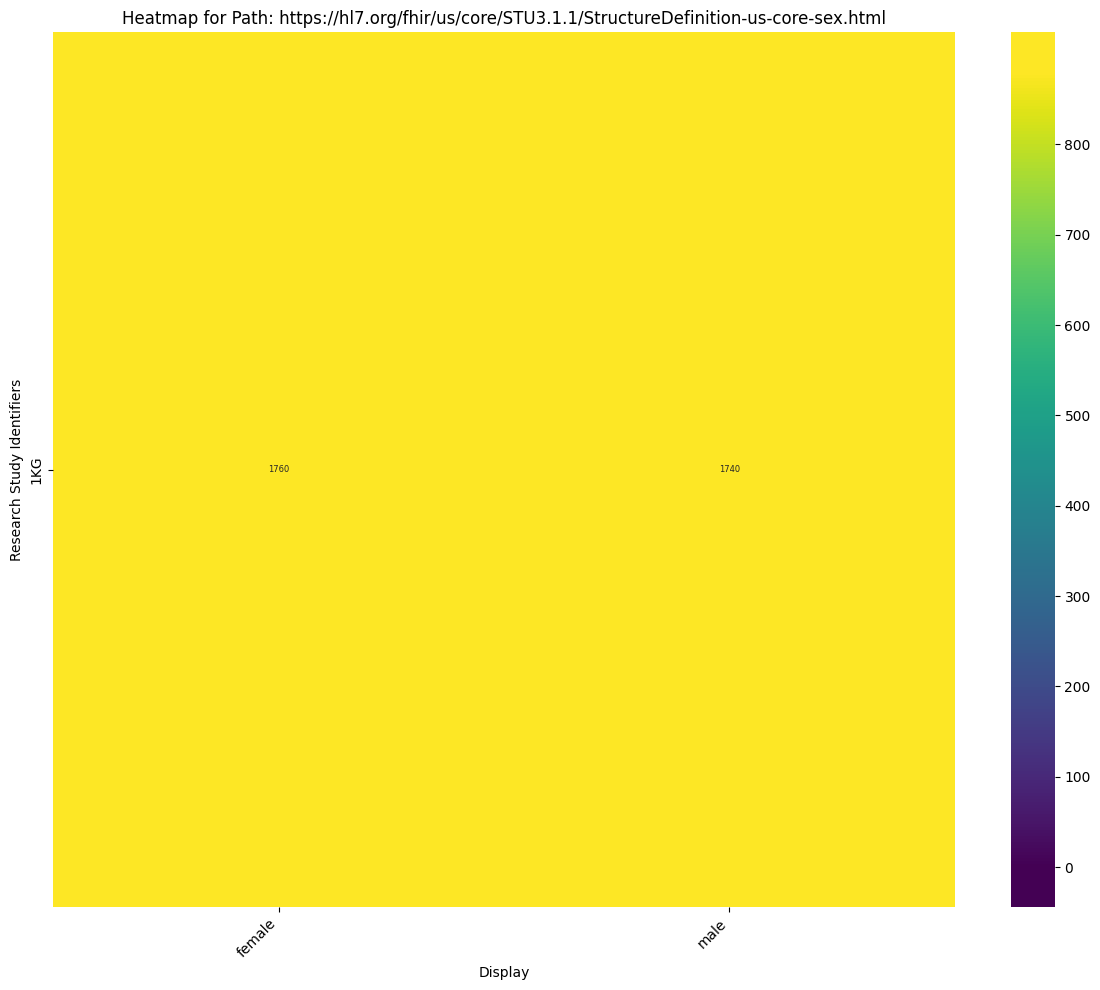

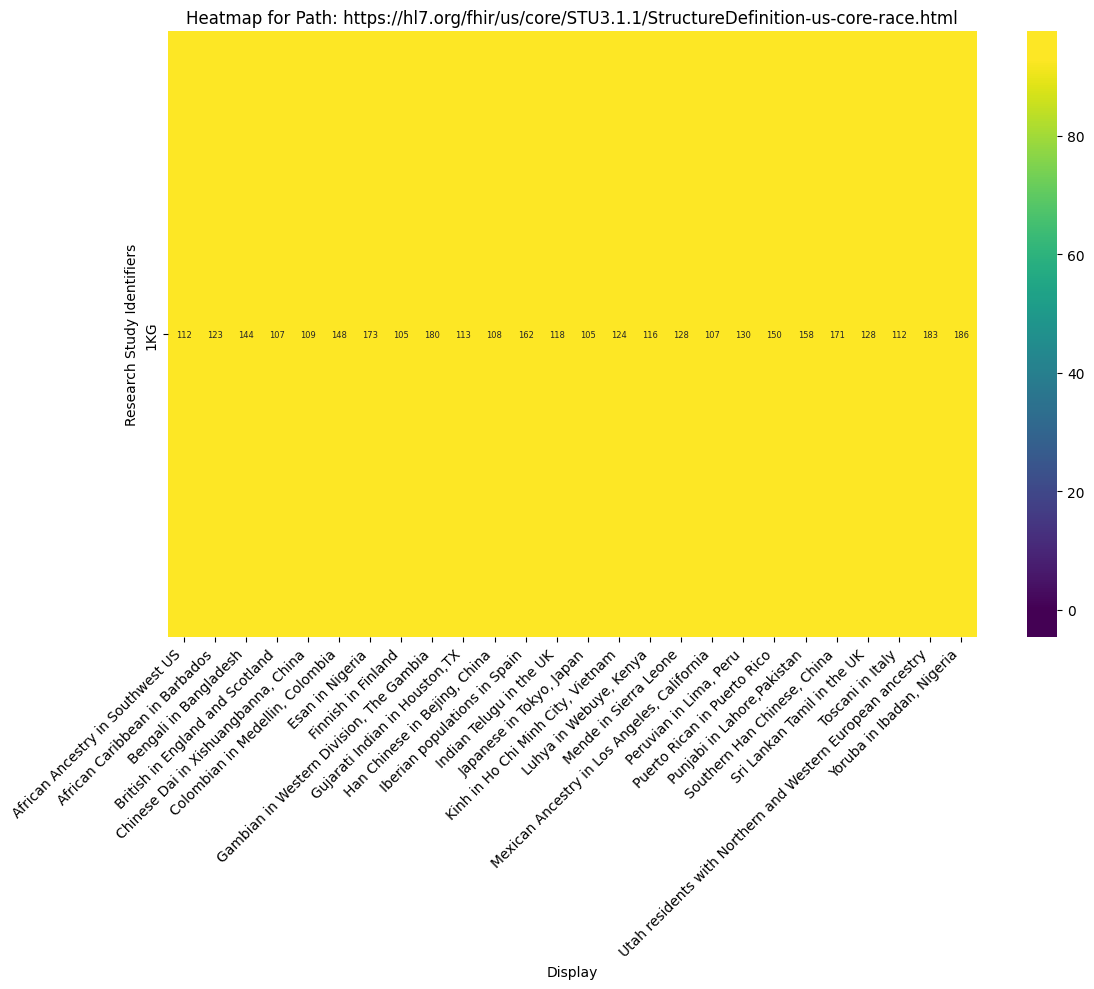

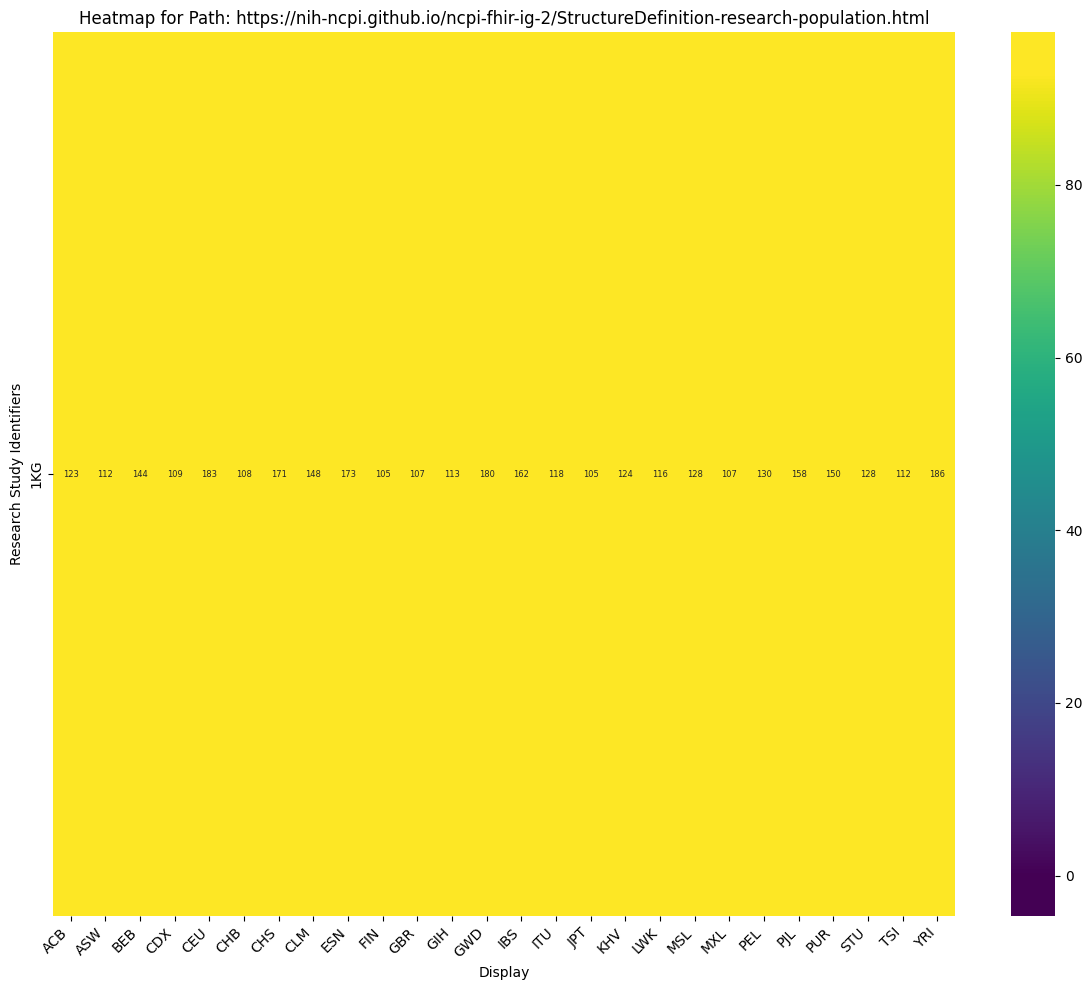

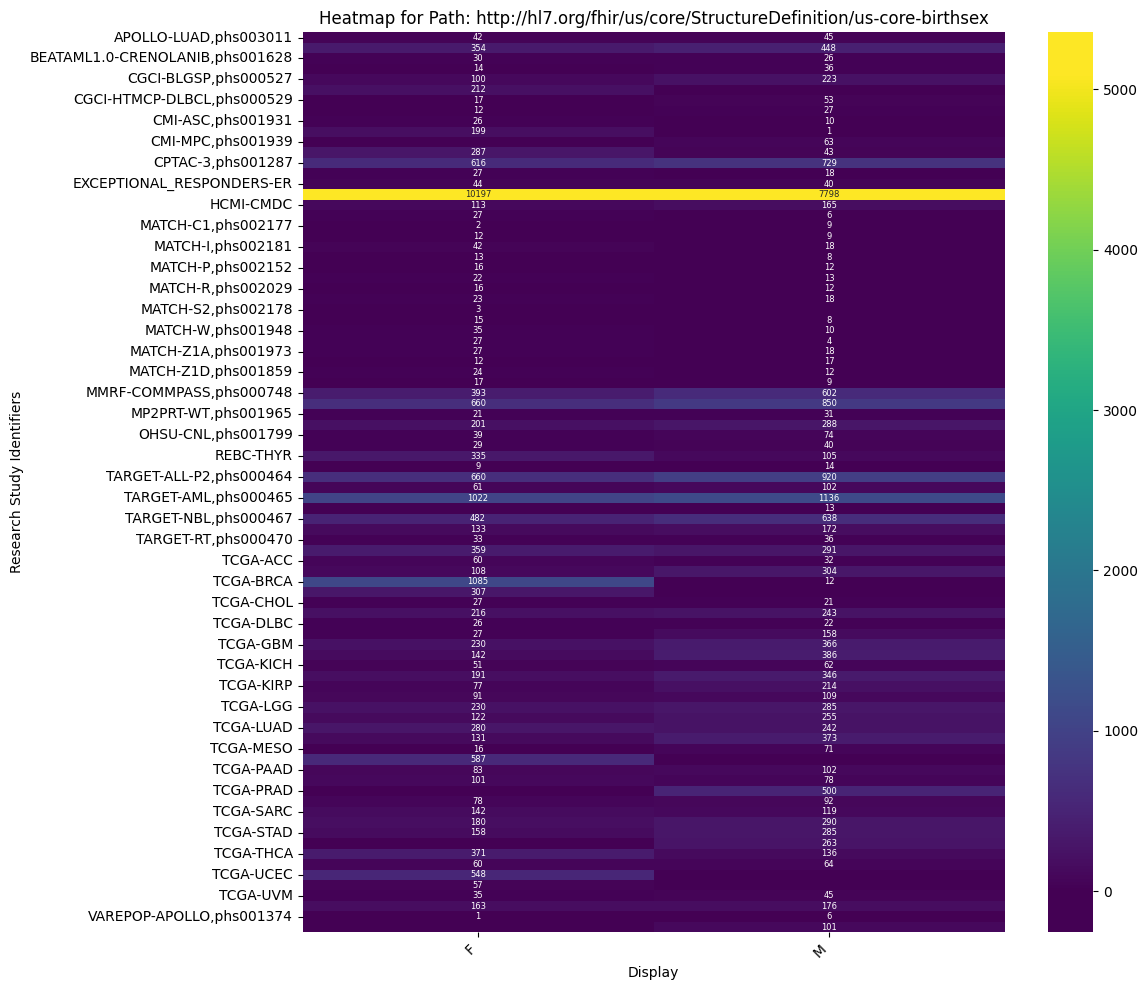

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Create heatmap for each extension

# Get unique extensions
extension_urls = combined_extension_code_counts['extension_url'].unique()
combined_extension_code_counts = combined_extension_code_counts.infer_objects(copy=False)

for extension_url in extension_urls:
    # Filter data for the current extension
    filtered_data = combined_extension_code_counts[combined_extension_code_counts['extension_url'] == extension_url]

    # Pivot the filtered data for the heatmap
    heatmap_data = filtered_data.pivot_table(index='research_study_identifiers',
                                            columns=['display'],
                                            values='count',
                                            fill_value=0.0)

    # Create the heatmap
    plt.figure(figsize=(12, 10))  # Adjust figsize as needed

    # sns.heatmap(heatmap_data, annot=True, annot_kws={"size": 6}, fmt=".0f", cmap='viridis', cbar=False)

    # Create a mask to identify zero values
    mask = heatmap_data == 0

 # Custom function to format annotations
    def heatmap_annot(val, **kwargs):
        if val == 0:  # Hide annotations for zero values
            return ""
        else:
            return f"{val:.0f}"  # Format non-zero values as integers


    # Generate heatmap with the custom annotation function
    ax = sns.heatmap(heatmap_data, annot=True, fmt=".0f", cmap='viridis',
                cbar_kws={'extend': 'both', 'extendrect': True},
                vmin=0,  # Set minimum value for color scale
                vmax=heatmap_data.max().max() / 2,  # Adjust maximum value
                annot_kws={"size": 6})  # Reduce font size


    # Apply the custom annotation function to each cell
    for text in ax.texts:
        text.set_text(heatmap_annot(float(text.get_text())))

    plt.title(f'Heatmap for Path: {extension_url}')  # Set title with path name
    plt.xlabel('Display')
    plt.ylabel('Research Study Identifiers')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()